In [7]:
# EDA for Skin Disease Dataset
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
from collections import Counter



In [8]:
# Path to processed images

DATASET_DIR = '../data/processed'

# Load all image paths and labels from train, test, val subfolders
image_paths = []
labels = []

for split in ['train', 'test', 'val']:
    split_dir = os.path.join(DATASET_DIR, split)
    for class_name in os.listdir(split_dir):
        class_dir = os.path.join(split_dir, class_name)
        if os.path.isdir(class_dir):
            for fname in os.listdir(class_dir):
                if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_paths.append(os.path.join(class_dir, fname))
                    labels.append(class_name)

print(f"Total images: {len(image_paths)}")
print(f"Total classes: {len(set(labels))}")


Total images: 22357
Total classes: 30


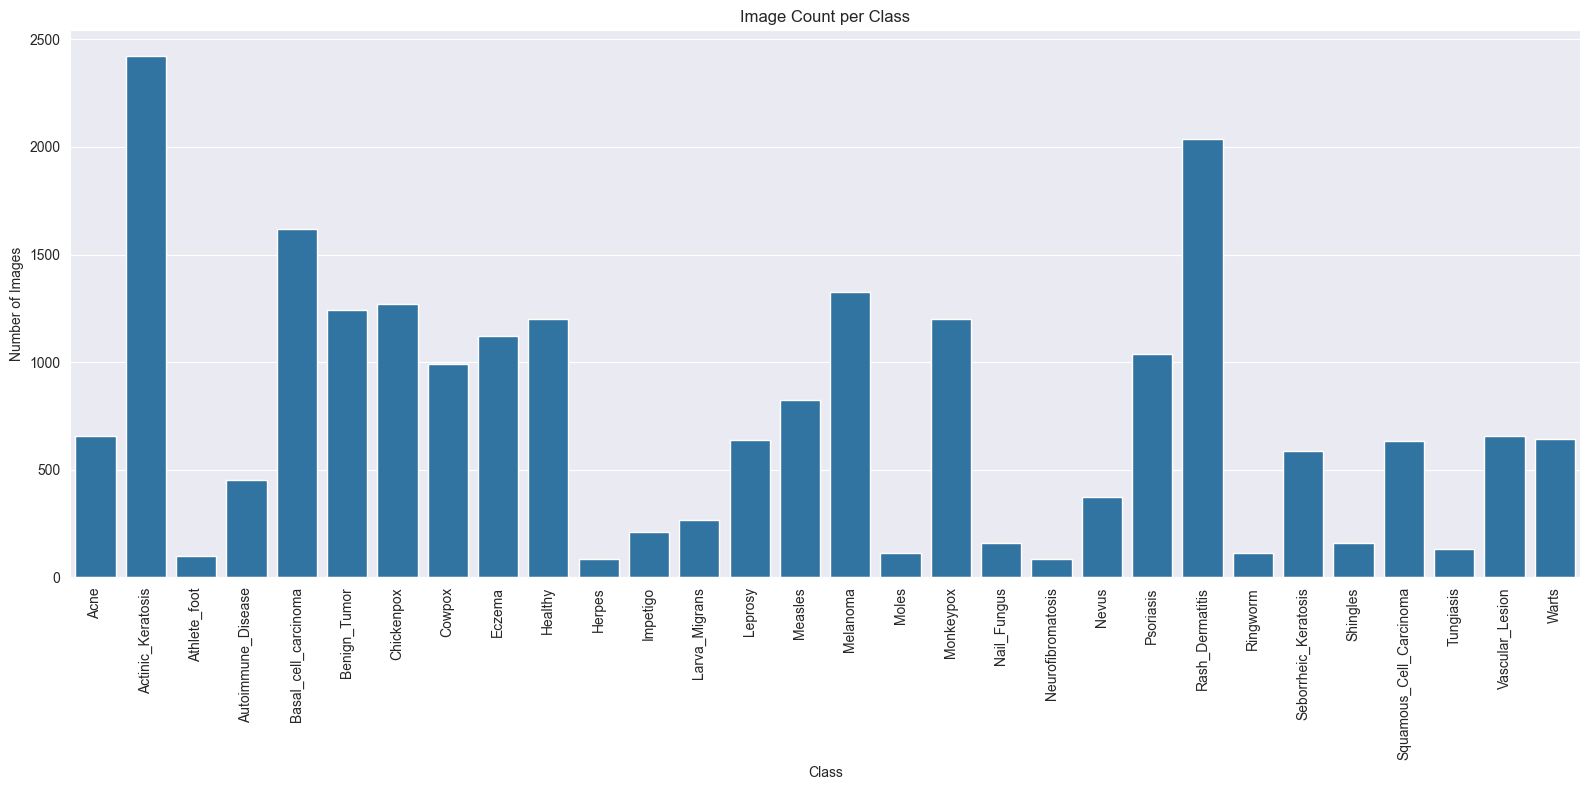

In [9]:
# --------------------------------
# 1. Class distribution
# --------------------------------
class_counts = Counter(labels)

plt.figure(figsize=(16, 8))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.xticks(rotation=90)
plt.title('Image Count per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

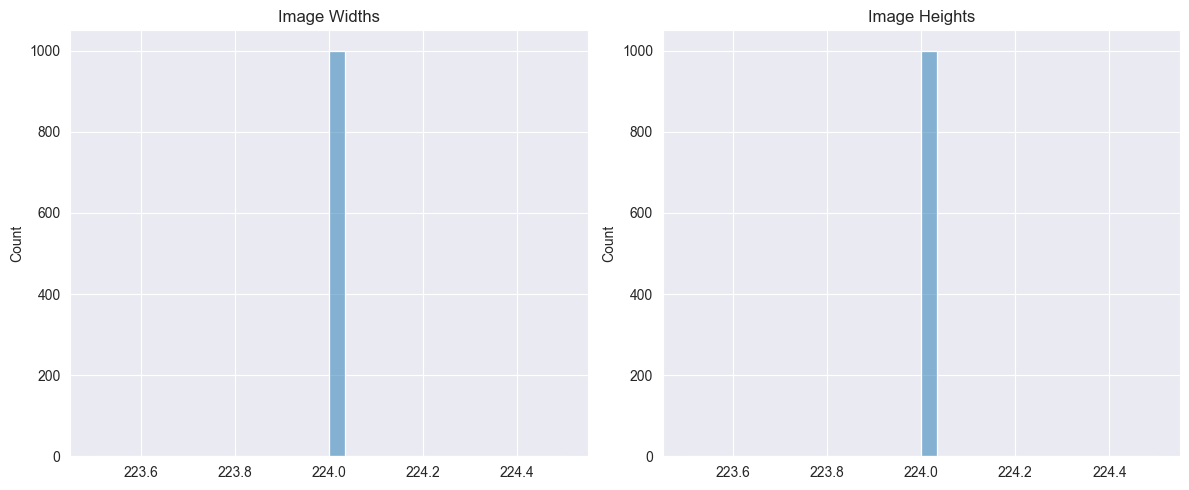

In [10]:
# --------------------------------
# 2. Image size distribution
# --------------------------------
img_shapes = []

for path in image_paths[:1000]:  # Limit to first 1000 for speed
    with Image.open(path) as img:
        img_shapes.append(img.size)

widths, heights = zip(*img_shapes)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, kde=True)
plt.title('Image Widths')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, kde=True)
plt.title('Image Heights')

plt.tight_layout()
plt.show()

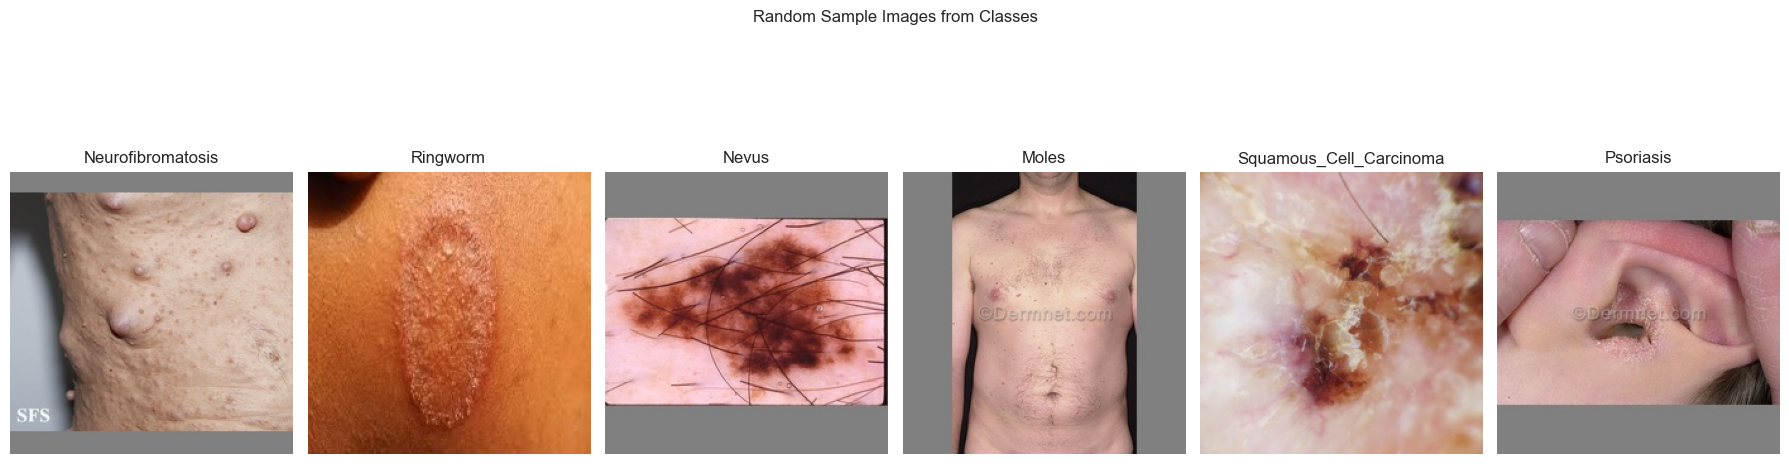

In [11]:
# --------------------------------
# 3. Show sample images per class
# --------------------------------
import random

def plot_sample_images_per_class(num_classes=6):
    selected_classes = random.sample(list(set(labels)), num_classes)
    plt.figure(figsize=(18, 6))
    for i, cls in enumerate(selected_classes):
        class_imgs = [p for p, l in zip(image_paths, labels) if l == cls]
        img_path = random.choice(class_imgs)
        with Image.open(img_path) as img:
            plt.subplot(1, num_classes, i + 1)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
    plt.suptitle("Random Sample Images from Classes")
    plt.tight_layout()
    plt.show()

plot_sample_images_per_class()

In [12]:
# --------------------------------
# 4. Summary stats
# --------------------------------
print("\nSummary Statistics:")
print(f"Average image width: {np.mean(widths):.2f}")
print(f"Average image height: {np.mean(heights):.2f}")
print(f"Max image size: {max(widths)} x {max(heights)}")
print(f"Min image size: {min(widths)} x {min(heights)}")


Summary Statistics:
Average image width: 224.00
Average image height: 224.00
Max image size: 224 x 224
Min image size: 224 x 224


In [13]:
# --------------------------------
# 5. Imbalance Check
# --------------------------------
most = max(class_counts.values())
least = min(class_counts.values())
imbalance_ratio = most / least if least else "undefined"

print(f"\nMost populated class: {max(class_counts, key=class_counts.get)} ({most} images)")
print(f"Least populated class: {min(class_counts, key=class_counts.get)} ({least} images)")
print(f"Imbalance ratio: {imbalance_ratio}")


Most populated class: Actinic_Keratosis (2420 images)
Least populated class: Neurofibromatosis (86 images)
Imbalance ratio: 28.13953488372093
